<a href="https://colab.research.google.com/github/Garvit2911/Bootcamp_DataScience/blob/main/stroke_predictionXAI(Interpretable_models)_LIME_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET : https://www.kaggle.com/competitions/playground-series-s3e2/data

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/stroke_prediction.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [ ]:
df['stroke'].value_counts()

stroke
0    14672
1      632
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
categorical_cols = ["gender","ever_married","work_type","Residence_type","smoking_status"]

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Columns to be encoded
categorical_columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,28.0,0,0,1,2,1,79.53,31.1,2,0
1,1,1,33.0,0,0,1,2,0,78.44,23.9,1,0
2,2,0,42.0,0,0,1,2,0,103.00,40.3,0,0
3,3,1,56.0,0,0,1,2,1,64.87,28.8,2,0
4,4,0,24.0,0,0,0,2,0,73.36,28.8,2,0


In [ ]:
X=df.drop(['id','stroke'], axis=1)
y=df['stroke']

In [ ]:
print(X.shape,'\n',y.shape)

(15304, 10) 
 (15304,)


col:  gender


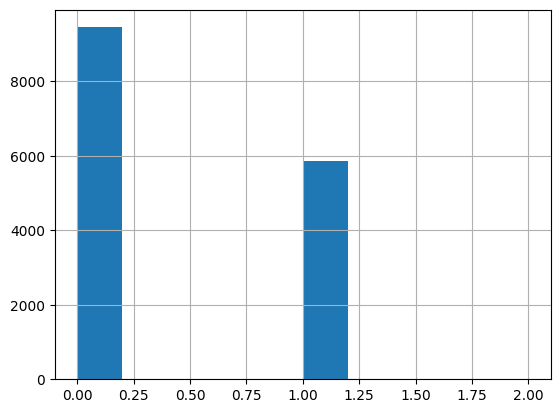

col:  age


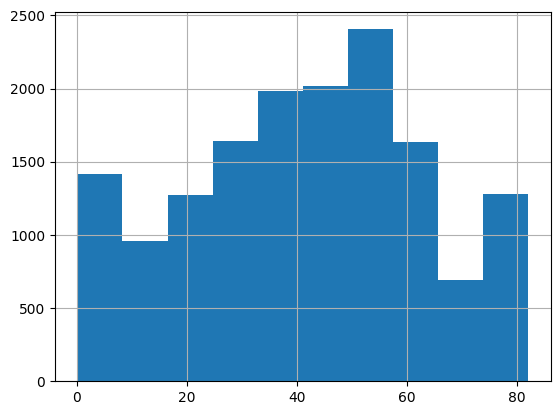

col:  hypertension


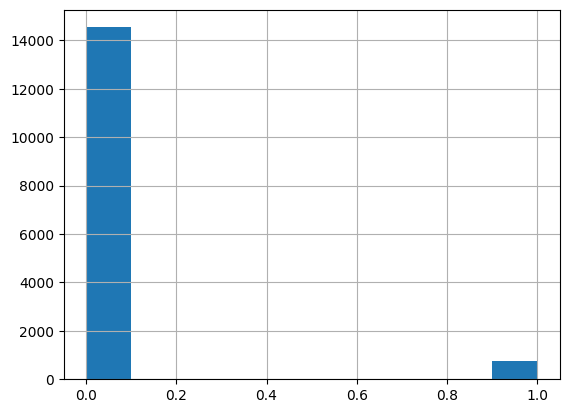

col:  heart_disease


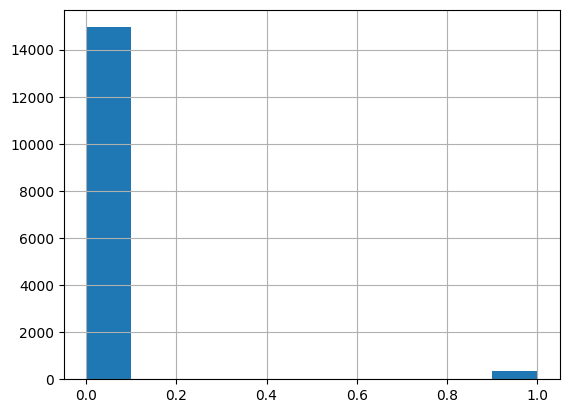

col:  ever_married


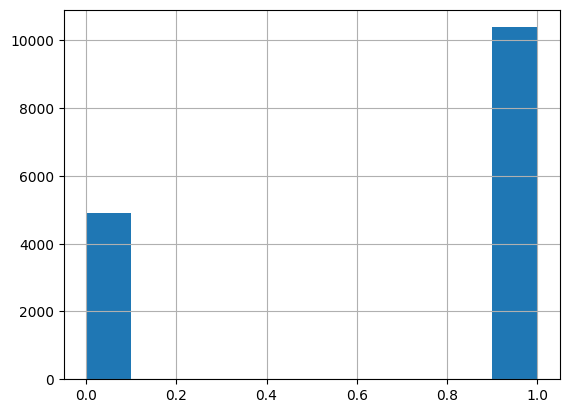

col:  work_type


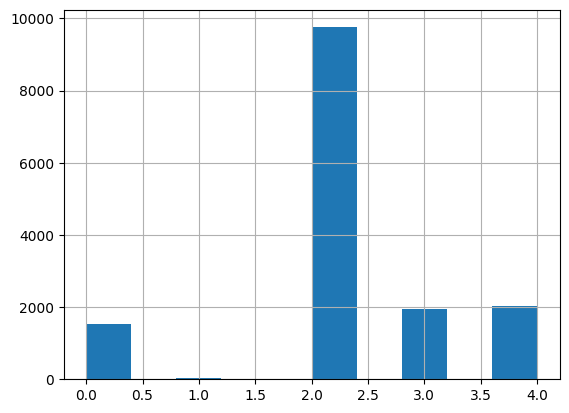

col:  Residence_type


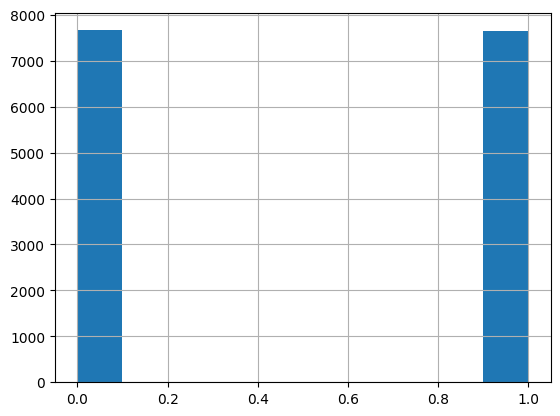

col:  avg_glucose_level


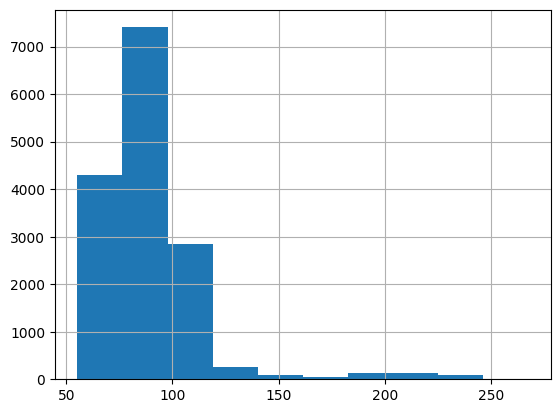

col:  bmi


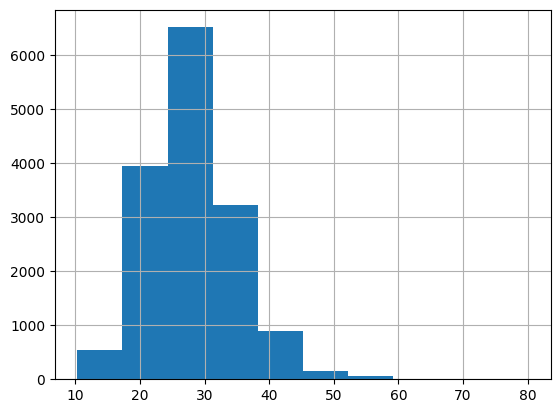

col:  smoking_status


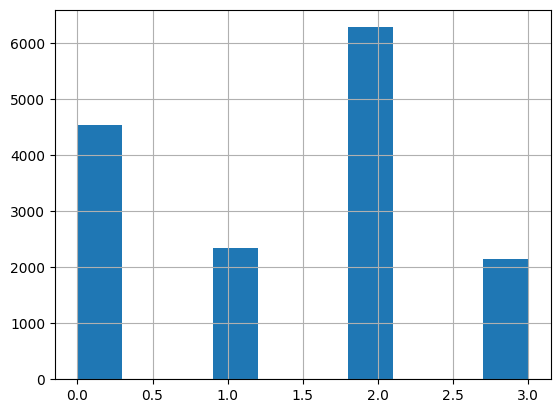

In [ ]:
# %% Show histogram for all columns
columns = X.columns
for col in columns:
    print("col: ", col)
    X[col].hist()
    plt.show()

Installing the library interpret :  InterpretML is an open-source package that incorporates state-of-the-art machine learning interpretability techniques under one roof. With this package, you can train interpretable glassbox models and explain blackbox systems.

In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 61.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.1-py3-none-any.whl size=4010600 sha256=6bbc63cb00e3a13914e9c3d511aac73ae0c9fd9d1987

Importing the glassbox models from interpret

In [ ]:
from interpret.glassbox import LogisticRegression, ClassificationTree, ExplainableBoostingClassifier
from interpret import show
# Example usage
#ebm = ExplainableBoostingClassifier()

In [ ]:
from sklearn.metrics import classification_report, f1_score

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Installing imbalanced learn package : To get rid of these imbalance class issues few techniques are used called as Imblearn Technique that is mainly used in these types of situations. Imblearn techniques help to either upsample the minority class or downsample the majority class to match the equal proportion.

In [ ]:
# Step 1: Install the imbalanced-learn package
!pip install imbalanced-learn

Random Oversampling involves supplementing the training data with multiple copies of some of the minority classes

In [ ]:
# Step 2: Import the necessary modules
from imblearn.over_sampling import RandomOverSampler

# Step 4: Initialize the RandomOverSampler
ros = RandomOverSampler()

# Step 5: Fit and resample the training data
X_train, y_train = ros.fit_resample(X_train, y_train)

# Step 6: Verify the results
print("Original dataset shape:", X_train.shape, y_train.shape)
print("Resampled dataset shape:", X_train.shape, y_train.shape)

Original dataset shape: (19678, 10) (19678,)
Resampled dataset shape: (19678, 10) (19678,)


Logistic Regression Model

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      4833
           1       0.15      0.82      0.25       218

    accuracy                           0.78      5051
   macro avg       0.57      0.80      0.56      5051
weighted avg       0.95      0.78      0.85      5051



In [ ]:
f1_score(y_test, y_pred)

0.24689655172413796

model.explain_local ---> explains the model locally on different records

In [ ]:
# %% Explain local prediction
lr_local = lr.explain_local(X_test[:100], y_test[:100], name='Logistic Regression')
show(lr_local)

model.explain_global ---> explains the model globally on the whole dataset

In [ ]:
# %% Explain global logistic regression model
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global)

Decision Tree

In [ ]:
tree = ClassificationTree()
tree.fit(X_train, y_train)

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      4833
           1       0.10      0.95      0.19       218

    accuracy                           0.64      5051
   macro avg       0.55      0.79      0.48      5051
weighted avg       0.96      0.64      0.75      5051



In [ ]:
f1_score(y_test, y_pred)

0.18823529411764706

In [ ]:
# %% Explain local prediction
tree_local = tree.explain_local(X_test[:100], y_test[:100], name='Tree')
show(tree_local)

tree with red path shows the prediction

Explainable Boosting Machine

In [ ]:
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

ExplainableBoostingClassifier()

In [ ]:
y_pred = ebm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4833
           1       0.23      0.30      0.26       218

    accuracy                           0.93      5051
   macro avg       0.60      0.63      0.61      5051
weighted avg       0.94      0.93      0.93      5051



In [ ]:
f1_score(y_test, y_pred)

0.26

In [ ]:
 #%% Explain local prediction
ebm_local = ebm.explain_local(X_test[:100], y_test[:100], name='EBM')
show(ebm_local)

In [ ]:
# %% Explain global logistic regression model
ebm_global = ebm.explain_global(name='Logistic Regression')
show(ebm_global)

LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=b6dc503bbd653cc2272e65ce0b9cfc287fafdabec060b2095bf187e7217a2914
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Import some features of Lime to explain the black box models to better know how model is working

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from interpret.blackbox import LimeTabular
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
f1_score(y_test, y_pred)

0.1473684210526316

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4833
           1       0.31      0.10      0.15       218

    accuracy                           0.95      5051
   macro avg       0.64      0.54      0.56      5051
weighted avg       0.93      0.95      0.94      5051



In [ ]:
lime = LimeTabular(
    model=rf,  # The trained model
    data=X_train,  # The training data
    random_state=1
)

# Step 5: Explain the local instances
explainer_local = lime.explain_local(
    X_test[-20:],  # The instances to explain
    y_test[-20:],  # The true labels for these instances
    name='LIME'
)

# Step 6: Display the explanation
show(explainer_local)

SHAP

In [ ]:
!pip install shap

In [ ]:
# # %% Create SHAP explainer
# explainer = shap.TreeExplainer(rf)
# # Calculate shapley values for test data
# start_index = 1
# end_index = 2
# shap_values = explainer.shap_values(X_test[start_index:end_index])
# X_test[start_index:end_index]

# # %% Investigating the values (classification problem)
# # class 0 = contribution to class 1
# # class 1 = contribution to class 2
# print(shap_values[0].shape)
# shap_values

# # %% >> Visualize local predictions
# shap.initjs()
# # Force plot
# prediction = rf.predict(X_test[start_index:end_index])[0]
# print(f"The RF predicted: {prediction}")
# shap.force_plot(explainer.expected_value[1],
#                 shap_values[1],
#                 X_test[start_index:end_index]) # for values

# # %% >> Visualize global features
# # Feature summary
# shap.summary_plot(shap_values, X_test)

Importing SHAP with other utilities

In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_train)

Variable Importance with Summary Plot

Variable Importance Plot - Global Interpretation


<Figure size 640x480 with 0 Axes>

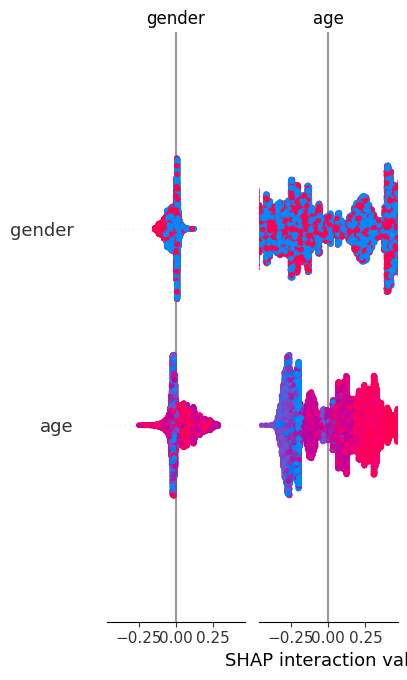

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_train)

In [ ]:
X_train.shape

(19678, 10)

In [ ]:
shap_values.shape

(19678, 10, 2)